# Portfolio Risk and Returns

In [1]:
# x) Remove redundant ticker symbols after dataframe is loaded?
# x) Inferences like vaccine stock spike, boom in AI, EV
# x) Predictions for future or just last 100 days?
# x) Error/Accuracy/Precision Calculation
# x) Combined data from NSE(Indian) and NASDAQ(American) companies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime, timedelta
from dateutil import relativedelta

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [3]:
data = pd.read_csv("NASDAQ Symbols.csv")
data.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AACG,ATA Creativity Global American Depositary Shares,$1.40,-0.05,-3.448%,4.583600e+07,China,2008.0,12942,Consumer Discretionary,Educational Services
1,AACIW,Armada Acquisition Corp. I Warrant,$0.06,0.00,0.00%,0.000000e+00,United States,2021.0,84274,Finance,Blank Checks
2,AADI,Aadi Bioscience Inc. Common Stock,$8.19,0.06,0.738%,2.001389e+08,United States,NaN,84735,Health Care,Biotechnology: Pharmaceutical Preparations
3,AAL,American Airlines Group Inc. Common Stock,$14.93,0.12,0.81%,9.703035e+09,United States,NaN,15840018,Consumer Discretionary,Air Freight/Delivery Services
4,AAME,Atlantic American Corporation Common Stock,$2.15,0.05,2.381%,4.378954e+07,United States,NaN,6947,Finance,Life Insurance


In [4]:
def symbol_search():
    print("---Portfolio Analyis---")
    key1 = "y"
    key2 = ""
    symbols = []
    while key1.lower() == "y":
        search_term = input("Enter the company name:")
        print("Companies found with matching string to", search_term, "are")
        for index, row in data.iterrows():
            string = row[1]
            if not(pd.isna(string)) and search_term.lower() in str(string).lower(): # Checking for NA values
                flag = 1
                print(string)
                key2 = input("Do you want to add this company? (Y/N)")
                if key2.lower() == "y":
                    symbols.append(row[0])
        if flag != 1:
            print("No matching companies were found.")
        key1 = input("Enter N to exit, Y to continue adding companies")
    return symbols   

In [5]:
# input
# Portfolio Stocks
symbols = symbol_search()

---Portfolio Analyis---
Companies found with matching string to apple are
Apple Inc. Common Stock
Pineapple Energy Inc. Common Stock
Companies found with matching string to tesla are
Tesla Inc. Common Stock
Companies found with matching string to google are
Companies found with matching string to alpha are
Air T Inc. Air T Funding Alpha Income Trust Preferred Securities
Alpha Healthcare Acquisition Corp. III Class A Common Stock
Alpha Healthcare Acquisition Corp. III Units
Alpha Star Acquisition Corporation Ordinary Shares
Alpha Star Acquisition Corporation Units
Alpha Star Acquisition Corporation Warrants
Alpha and Omega Semiconductor Limited Common Shares
Alpha Partners Technology Merger Corp. Class A Ordinary Shares
Alpha Partners Technology Merger Corp. Unit
Alpha Partners Technology Merger Corp. Warrant
Alphatec Holdings Inc. Common Stock
AlphaTime Acquisition Corp Ordinary Shares
AlphaTime Acquisition Corp Right
AlphaVest Acquisition Corp Ordinary Shares
Alpha Tau Medical Ltd. Or

In [6]:
# Upload date
flag  = 0
flag2 = 0
while(flag == 0):
    start = input("Enter the date from which analysis should be started(in yyyy-mm-dd format)")
    end = input("Enter the date from which analysis should end (in yyyy-mm-dd format)")
    d1 = datetime.strptime(start, "%Y-%m-%d")
    d2 = datetime.strptime(end, "%Y-%m-%d")
    delta = d2-d1
    if delta < timedelta(days = 100):
        print("Dates should be more than 100 days apart")
        continue
    else:
        flag = 1       

In [7]:
# "Adj Close" is used as the column name within the retrieved data. It represents the adjusted closing price of the respective symbol for each date.
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
df.head()

,AAPL,TSLA,GOOG
Date,,,
2020-02-03,75.377304,52.000000,74.296997
2020-02-04,77.865791,59.137333,72.353500
2020-02-05,78.500732,48.980000,72.411499
2020-02-06,79.418968,49.930668,73.811501
2020-02-07,78.339447,49.871334,73.961502


In [9]:
df.describe()

,AAPL,TSLA,GOOG
count,756.000000,756.000000,756.000000
mean,130.568512,209.176623,105.503146
std,29.435127,92.280944,26.297804
min,54.923035,24.081333,52.831001
25%,117.072100,140.381660,82.591877
50%,135.082611,223.651665,104.763748
75%,149.705551,276.565002,129.243504
max,180.434296,409.970001,150.709000


In [10]:
delta = relativedelta.relativedelta(d2,d1)
print("How many years of investing?")
print('%s years' % delta.years)

How many years of investing?
3 years


In [11]:
days = (df.index[-1] - df.index[0]).days
print("How many days of investing?")
print('%s days'% days)

How many days of investing?
1094 days


In [12]:
df.head()

,AAPL,TSLA,GOOG
Date,,,
2020-02-03,75.377304,52.000000,74.296997
2020-02-04,77.865791,59.137333,72.353500
2020-02-05,78.500732,48.980000,72.411499
2020-02-06,79.418968,49.930668,73.811501
2020-02-07,78.339447,49.871334,73.961502


In [13]:
df.tail()

,AAPL,TSLA,GOOG
Date,,,
2023-01-26,143.541992,160.270004,99.160004
2023-01-27,145.506256,177.899994,100.709999
2023-01-30,142.584778,166.660004,97.949997
2023-01-31,143.871017,173.220001,99.870003
2023-02-01,145.007706,181.410004,101.430000


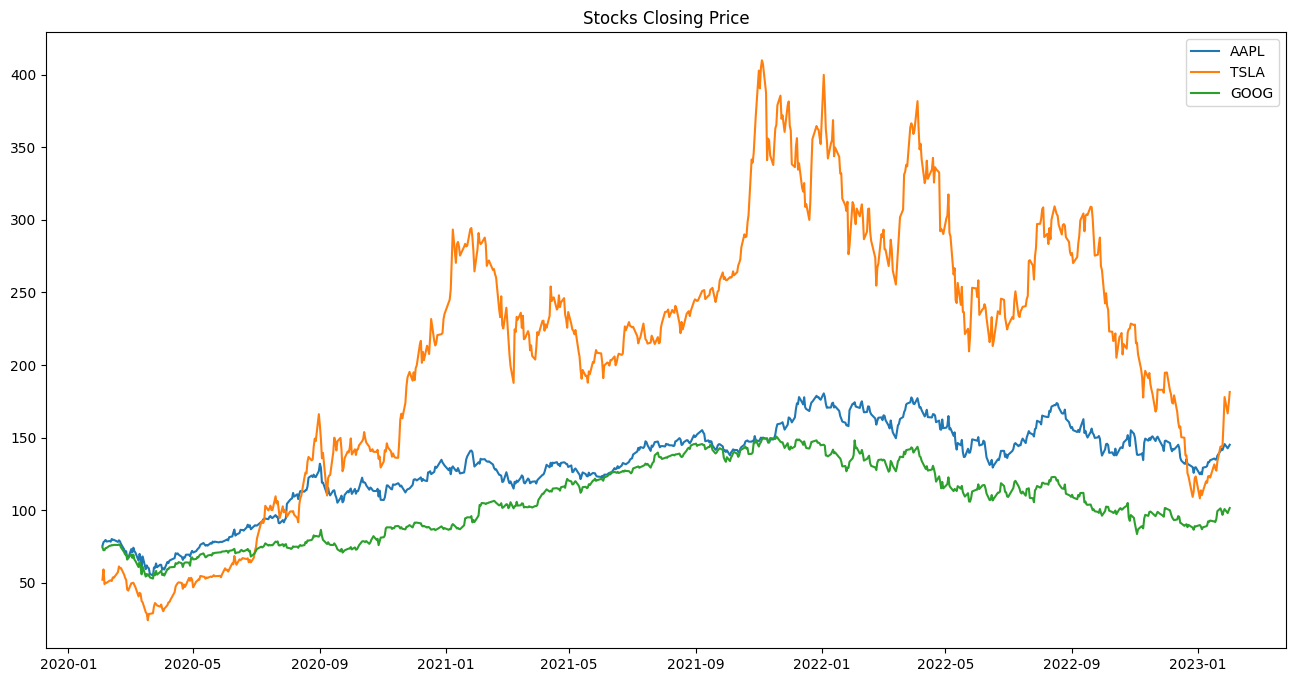

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df)
plt.title('Stocks Closing Price')
plt.legend(labels=df.columns)

In [17]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

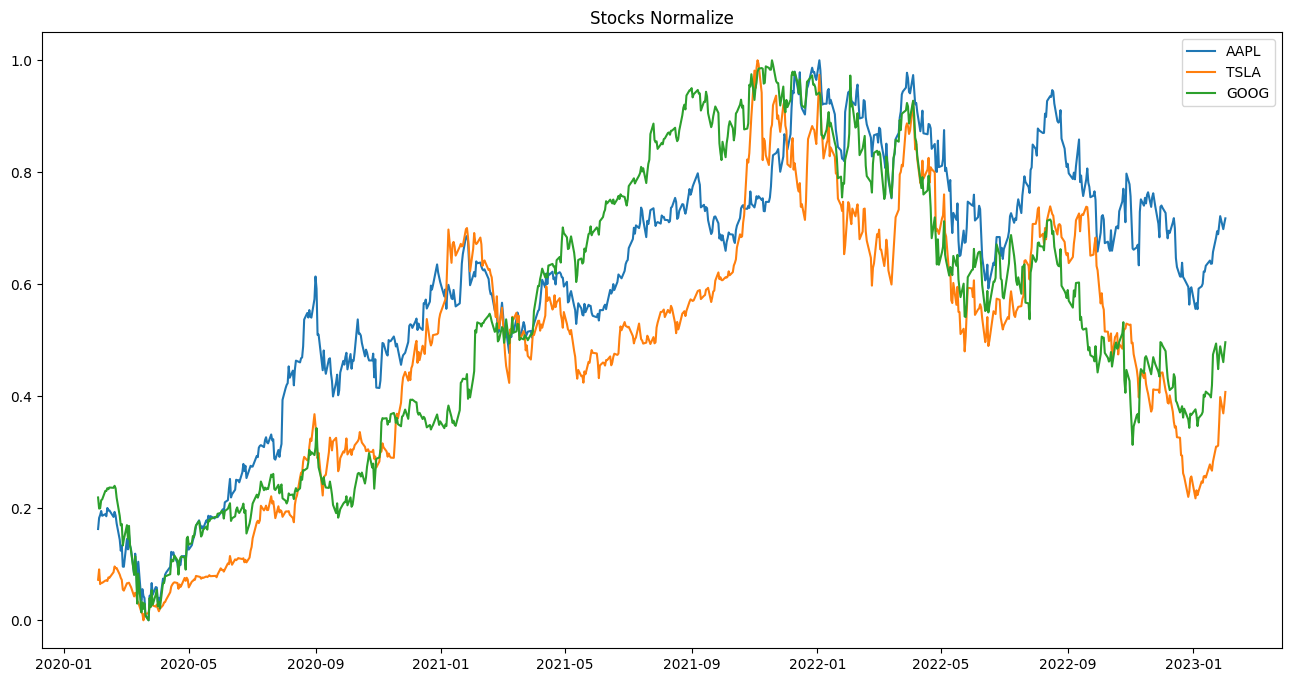

In [18]:
plt.figure(figsize=(16,8))
plt.plot(normalize)
plt.title("Stocks Normalize")
plt.legend(labels=normalize.columns)

In [21]:
# plots percentage change of stocks after dropping null values
stock_rets = df.pct_change().dropna()

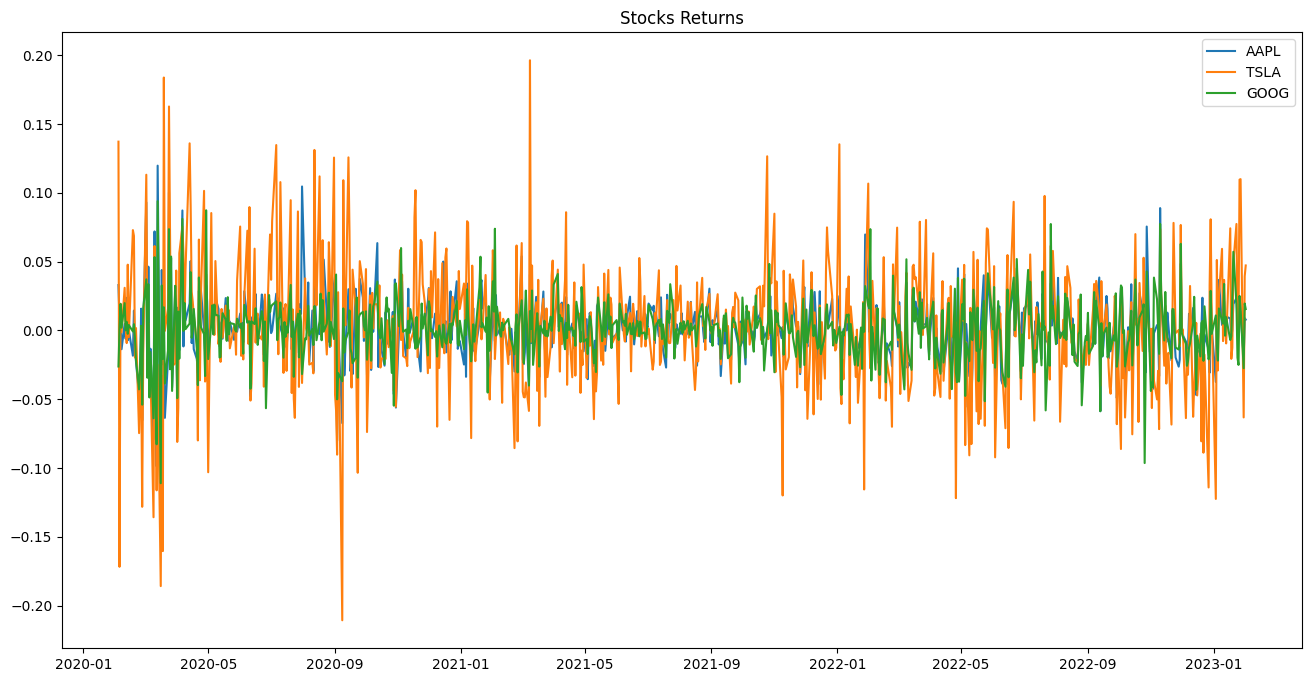

In [22]:
plt.figure(figsize=(16,8))
plt.plot(stock_rets)
plt.title("Stocks Returns")
plt.legend(labels=stock_rets.columns)

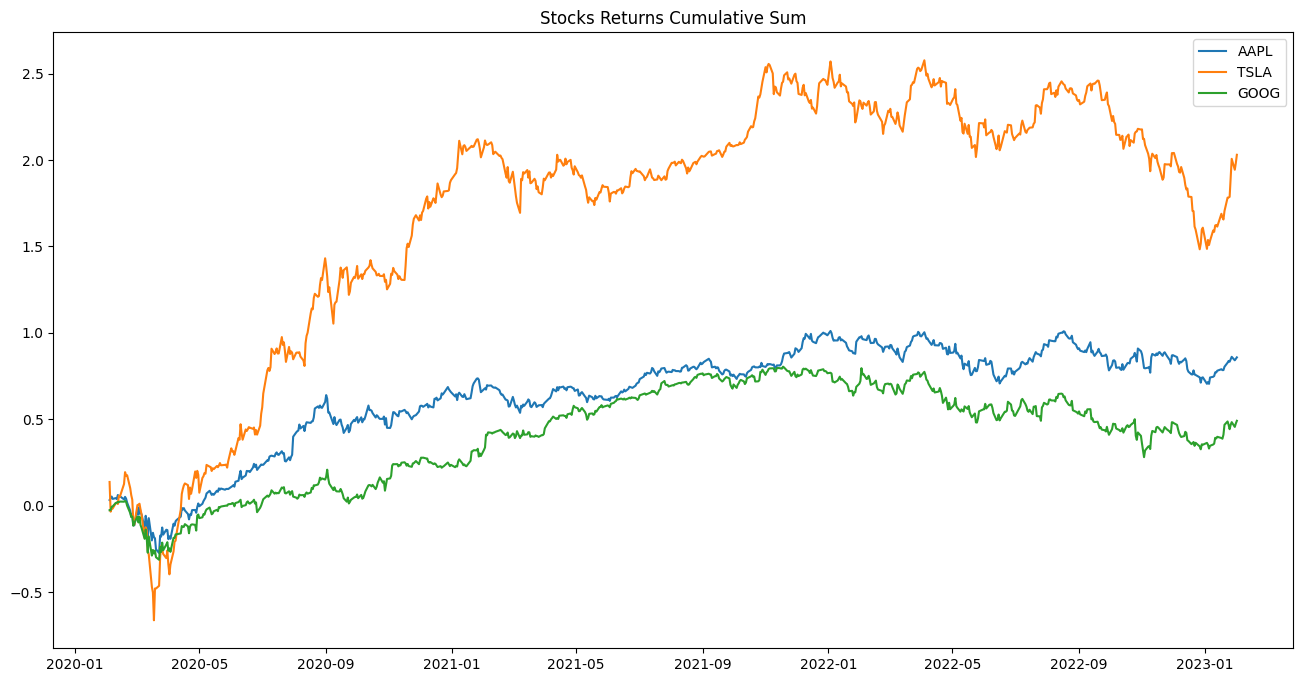

In [23]:
plt.figure(figsize=(16,8))
plt.plot(stock_rets.cumsum())
plt.title("Stocks Returns Cumulative Sum")
plt.legend(labels=stock_rets.columns)

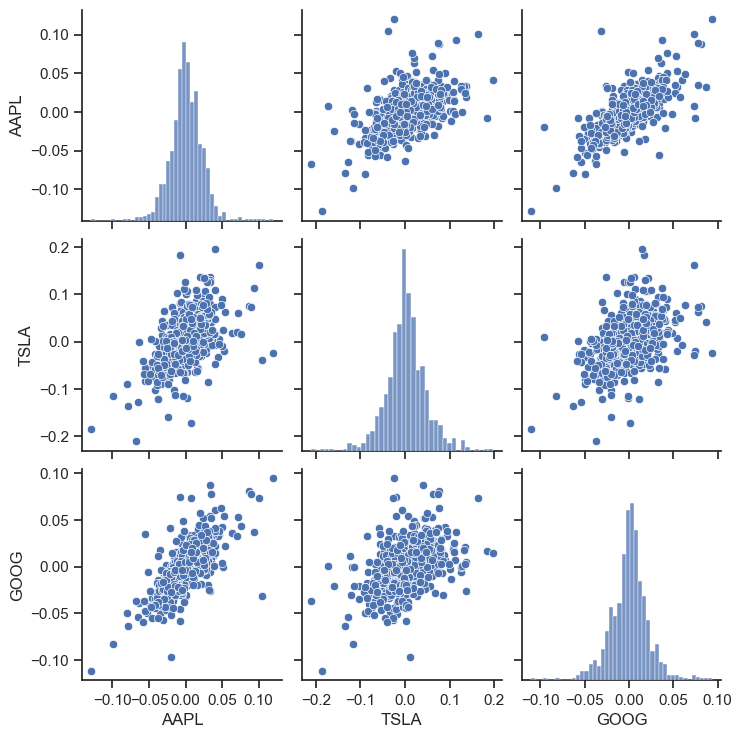

In [24]:
sns.set(style="ticks")
ax = sns.pairplot(stock_rets, diag_kind="hist")

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis="x", nbins=6, tight=True)

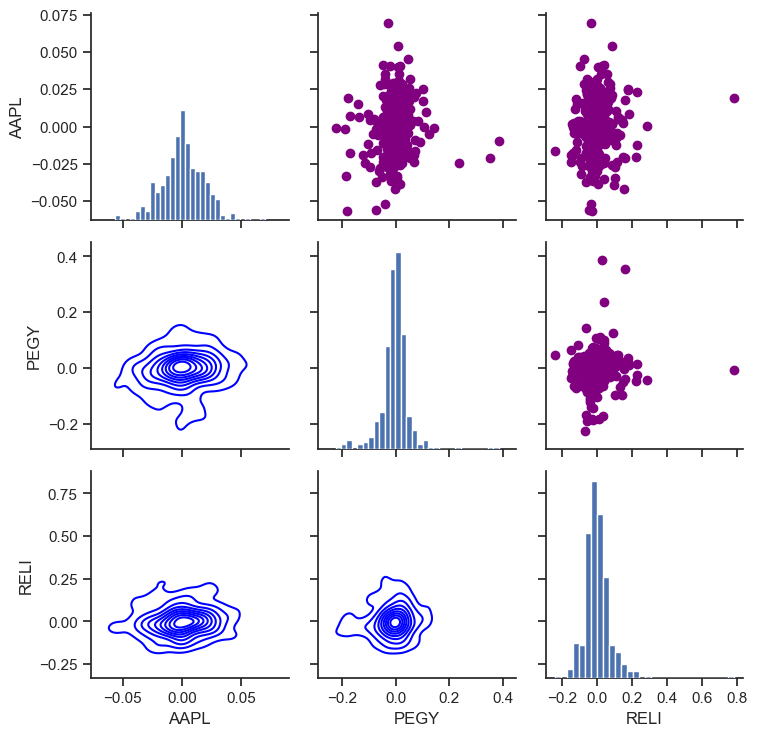

In [27]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color="purple")
ax.map_lower(sns.kdeplot, color="blue")
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis="x", nbins=6, tight=True)

<Axes: >

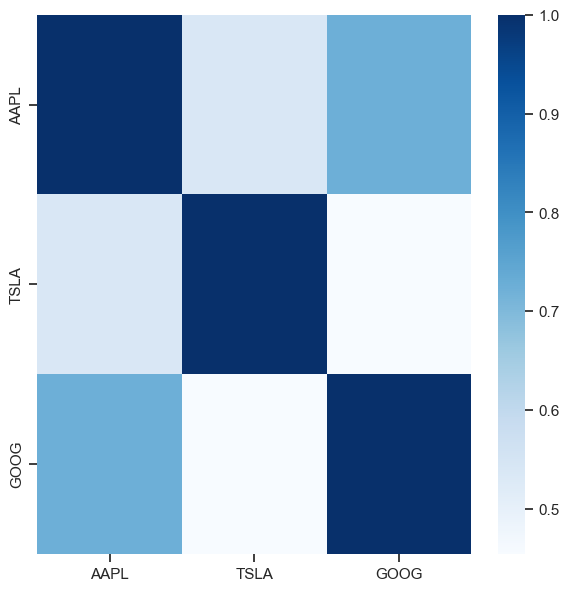

In [25]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

<Axes: >

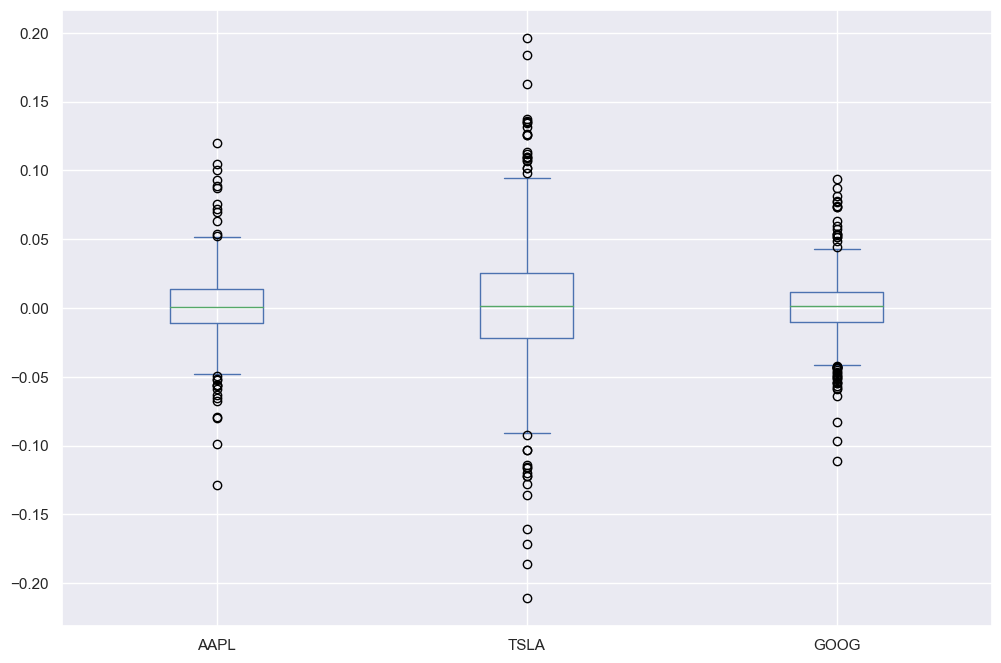

In [29]:
# Box plot
stock_rets.plot(kind="box",figsize=(12,8))

In [30]:
"""

rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title("Stocks Risk & Returns")
plt.xlabel("Expected returns")
plt.ylabel("Risk")
plt.grid(which="major")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = "offset points", ha = "right", va = "bottom",
        arrowprops = dict(arrowstyle = "-", connectionstyle = "arc3,rad=-0.3"))

"""

'\n\nrets = stock_rets.dropna()\n\nplt.figure(figsize=(12,8))\nplt.scatter(rets.mean(), rets.std(),alpha = 0.5)\n\nplt.title("Stocks Risk & Returns")\nplt.xlabel("Expected returns")\nplt.ylabel("Risk")\nplt.grid(which="major")\n\nfor label, x, y in zip(rets.columns, rets.mean(), rets.std()):\n    plt.annotate(\n        label, \n        xy = (x, y), xytext = (50, 50),\n        textcoords = "offset points", ha = "right", va = "bottom",\n        arrowprops = dict(arrowstyle = "-", connectionstyle = "arc3,rad=-0.3"))\n\n'

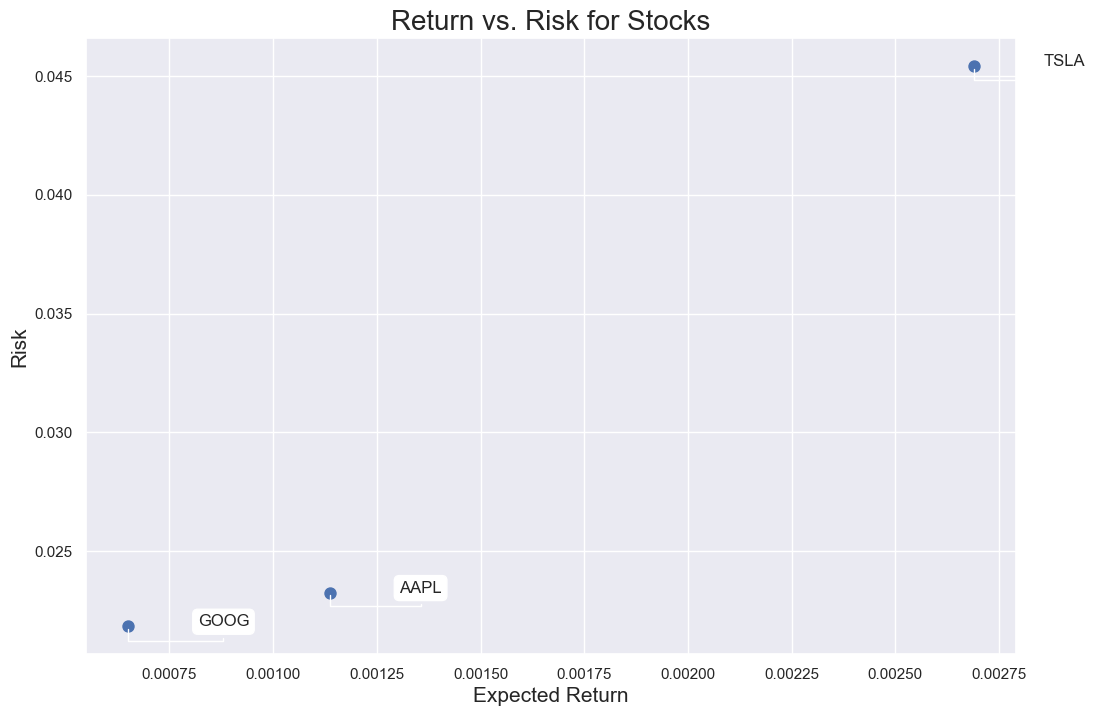

In [32]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords="offset points",
                arrowprops=dict(arrowstyle="-", connectionstyle="bar,angle=180,fraction=-0.2"),
                bbox=dict(boxstyle="round", fc="w"))

///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

In [33]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

AAPL  AAPL    1.000000
TSLA  TSLA    1.000000
GOOG  GOOG    1.000000
AAPL  GOOG    0.724949
GOOG  AAPL    0.724949
AAPL  TSLA    0.538556
TSLA  AAPL    0.538556
      GOOG    0.454610
GOOG  TSLA    0.454610
dtype: float64

In [34]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,AAPL,TSLA,GOOG
Date,,,
2020-02-04,0.650663,0.854669,0.413851
2020-02-05,0.550607,0.095494,0.545348
2020-02-06,0.564867,0.565147,0.635739
2020-02-07,0.463078,0.514543,0.551350
2020-02-10,0.536902,0.593687,0.638543


In [35]:
Normalized_Value.corr()

,AAPL,TSLA,GOOG
AAPL,1.000000,0.538556,0.724949
TSLA,0.538556,1.000000,0.454610
GOOG,0.724949,0.454610,1.000000


In [36]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

AAPL  AAPL    1.000000
TSLA  TSLA    1.000000
GOOG  GOOG    1.000000
AAPL  GOOG    0.724949
GOOG  AAPL    0.724949
AAPL  TSLA    0.538556
TSLA  AAPL    0.538556
      GOOG    0.454610
GOOG  TSLA    0.454610
dtype: float64

In [37]:
print("Stock returns: ")
print(rets.mean())
print("-" * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
AAPL    0.001137
TSLA    0.002689
GOOG    0.000651
dtype: float64
--------------------------------------------------
Stock risks:
AAPL    0.023251
TSLA    0.045415
GOOG    0.021832
dtype: float64


In [38]:
table = pd.DataFrame()
table["Returns"] = rets.mean()
table["Risk"] = rets.std()
table.sort_values(by="Returns")

,Returns,Risk
GOOG,0.000651,0.021832
AAPL,0.001137,0.023251
TSLA,0.002689,0.045415


In [39]:
table.sort_values(by="Risk")

,Returns,Risk
GOOG,0.000651,0.021832
AAPL,0.001137,0.023251
TSLA,0.002689,0.045415


In [40]:
rf = 0.01
table["Sharpe Ratio"] = (table["Returns"] - rf) / table["Risk"]
table

,Returns,Risk,Sharpe Ratio
AAPL,0.001137,0.023251,-0.381202
TSLA,0.002689,0.045415,-0.160976
GOOG,0.000651,0.021832,-0.428241


In [41]:
table["Max Returns"] = rets.max()

In [42]:
table["Min Returns"] = rets.min()

In [43]:
table["Median Returns"] = rets.median()

In [44]:
total_return = stock_rets[-1:].transpose()
table["Total Return"] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
AAPL,0.001137,0.023251,-0.381202,0.119809,-0.128647,0.000743,0.790075
TSLA,0.002689,0.045415,-0.160976,0.196412,-0.210628,0.001803,4.728093
GOOG,0.000651,0.021832,-0.428241,0.094017,-0.111008,0.001317,1.562028


In [46]:
table["Average Return Yearly"] = (1 + total_return)**(1 / delta.years) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly
AAPL,0.001137,0.023251,-0.381202,0.119809,-0.128647,0.000743,0.790075,0.002627
TSLA,0.002689,0.045415,-0.160976,0.196412,-0.210628,0.001803,4.728093,0.015518
GOOG,0.000651,0.021832,-0.428241,0.094017,-0.111008,0.001317,1.562028,0.005180


In [47]:
# Assuming 252 trading days a year
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table["CAGR"] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
AAPL,0.001137,0.023251,-0.381202,0.119809,-0.128647,0.000743,0.790075,0.002627,0.162662
TSLA,0.002689,0.045415,-0.160976,0.196412,-0.210628,0.001803,4.728093,0.015518,0.333521
GOOG,0.000651,0.021832,-0.428241,0.094017,-0.111008,0.001317,1.562028,0.005180,0.074340


In [48]:
table.sort_values(by="Average Return Yearly")

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Yearly,CAGR
AAPL,0.001137,0.023251,-0.381202,0.119809,-0.128647,0.000743,0.790075,0.002627,0.162662
GOOG,0.000651,0.021832,-0.428241,0.094017,-0.111008,0.001317,1.562028,0.005180,0.074340
TSLA,0.002689,0.045415,-0.160976,0.196412,-0.210628,0.001803,4.728093,0.015518,0.333521
